## Convolutional Neural Network
Contains two main thing:
* convolution and the output is list of feature maps
* pooling (usually max)

Let's play around with them, to visalise and understand it better

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

from scipy.misc import face
import numpy as np

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

## Read MNIST

In [40]:
(X_train, y_train_orig), (X_test, y_test_orig) = mnist.load_data()

img = X_train[12] #you can select another image, just change index
I = img.reshape((1, img.shape[0], img.shape[1], 1)) # nr image, rows, cols, channels

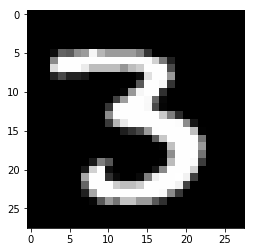

In [41]:
plt.gray()
plt.imshow(img)

In [58]:
n_filters = 9

model = Sequential()
model.add(Conv2D(n_filters, kernel_size=(3, 3), padding='valid', input_shape=I.shape[1:]))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(n_filters, kernel_size=(3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.compile(loss='mse', optimizer='adam')

model.summary()
pred = model.predict(I)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 9)         90        
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


## Visualize

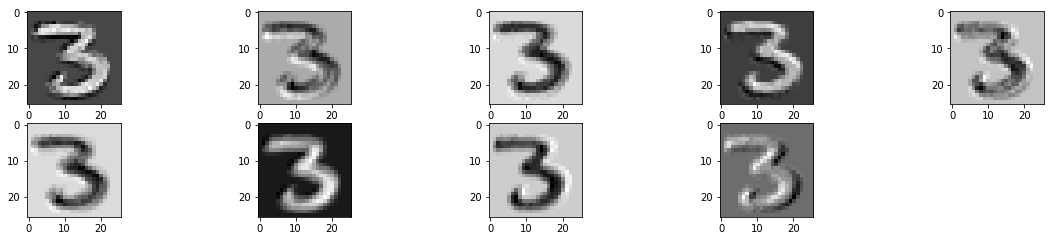

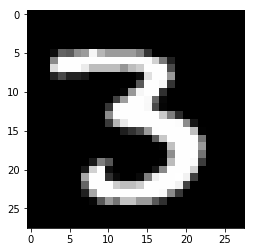

In [59]:
plt.figure(figsize=(20,10))

for i in range(n_filters):
    plt.subplot("55{0}".format(i+1) )
    plt.imshow(pred[0,:,:,i])

plt.show()

plt.imshow(img)

## Tasks

Play around with...
1. different number layers
2. different number feature maps
3. with pooling (turn on and later change e.g. `2,2` or `3,3`)
4. with padding (`valid` or `same`)

## Colour

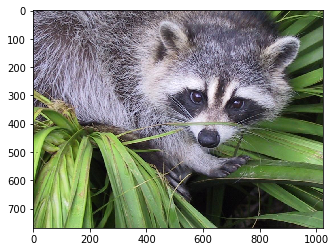

In [61]:
img = face()

I = img.reshape((1, img.shape[0], img.shape[1], 3)) # nr image, rows, cols, channels
plt.imshow(img)

In [64]:
n_filters = 9

model = Sequential()
model.add(Conv2D(n_filters, kernel_size=(3, 3), padding='valid', input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(n_filters, kernel_size=(3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.compile(loss='mse', optimizer='adam')

model.summary()

pred = model.predict(I)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 766, 1022, 9)      252       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 383, 511, 9)       0         
Total params: 252
Trainable params: 252
Non-trainable params: 0
_________________________________________________________________


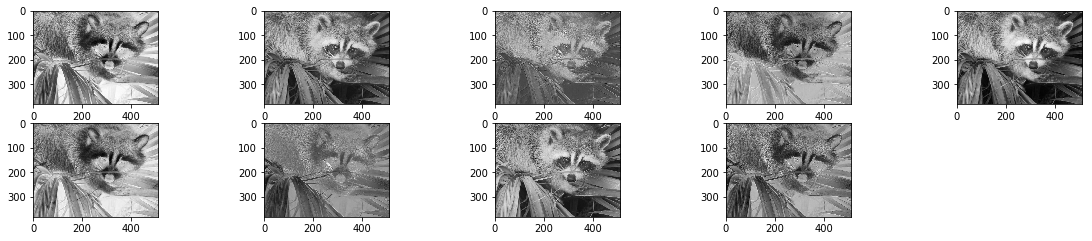

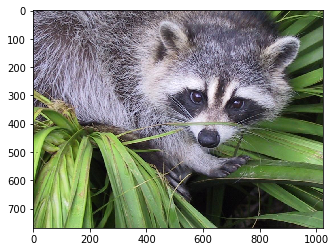

In [65]:
plt.figure(figsize=(20,10))

for i in range(n_filters):
    plt.subplot("55{0}".format(i+1) )
    plt.imshow(pred[0,:,:,i])

plt.show()

plt.imshow(img)